<a href="https://colab.research.google.com/github/gulabpatel/Topic_Modeling/blob/main/06_Topic_Modeling_Top2Vec%5Bsentence_encoders%5D_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Top2Vec Tutorial

## Working Of Top2Vec:


1.   Generate embedding vectors for documents and words.
2.   Perform dimensionality reduction on the vectors using an algorithm such as UMAP.
3. Cluster the vectors using a clustering algorithm such as HDBSCAN.
4. Assign topics to each cluster.


Top2Vec github repo: https://github.com/ddangelov/Top2Vec
Video walkthrough code: https://www.youtube.com/watch?v=OAQqKL9atRs&t=549s

In [ ]:
!pip install top2vec[sentence_encoders]

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec

## Read the Data

In [3]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [4]:
newsgroups.data

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per

In [5]:
len(newsgroups.data)

18846

## Training a Top2Vec Model

In [7]:
from top2vec import Top2Vec
model = Top2Vec(newsgroups.data, workers=4, embedding_model='universal-sentence-encoder')##Doc2Vec, Universal Sentence Encoder or BERT Sentence Transformer.

2022-06-12 14:37:26,820 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-12 14:37:49,839 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-06-12 14:38:06,489 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-12 14:38:46,202 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

## Viewing the Number of Topics

In [8]:
model.get_num_topics()

96

In [9]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [10]:
topic_sizes

array([1402,  799,  720,  710,  669,  667,  602,  599,  590,  416,  399,
        384,  339,  339,  329,  319,  309,  309,  282,  255,  246,  246,
        237,  231,  222,  218,  217,  211,  209,  200,  172,  168,  167,
        166,  166,  150,  150,  148,  145,  139,  139,  137,  135,  133,
        131,  130,  127,  126,  111,  107,  107,  105,   99,   98,   97,
         95,   91,   91,   88,   88,   87,   86,   84,   84,   84,   83,
         82,   82,   81,   81,   80,   76,   75,   74,   74,   73,   73,
         73,   69,   65,   62,   60,   59,   58,   58,   58,   56,   55,
         55,   50,   49,   47,   41,   37,   29,   25])

In [11]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

## Getting Keywords for Each Topic

In [12]:
model.topic_words

array([['theology', 'christians', 'scripture', ..., 'faith',
        'contradictory', 'rev'],
       ['recchi', 'nyr', 'nhl', ..., 'yankees', 'reilly', 'edmonton'],
       ['diagnosed', 'symptoms', 'diagnosis', ..., 'tested', 'contains',
        'admitted'],
       ...,
       ['ticket', 'tickets', 'plane', ..., 'favor', 'fd', 'atlanta'],
       ['utilities', 'neighbors', 'neighbor', ..., 'switches',
        'concerning', 'concern'],
       ['liefeld', 'wolverine', 'comics', ..., 'requests', 'tickets',
        'lemieux']], dtype='<U15')

In [13]:
model.topic_words[0]

array(['theology', 'christians', 'scripture', 'scriptures', 'bible',
       'biblical', 'atheist', 'believer', 'elohim', 'gospel', 'beliefs',
       'believers', 'doctrines', 'christianity', 'verses', 'theists',
       'contradict', 'theism', 'lds', 'catholics', 'religions',
       'teachings', 'atheists', 'doctrine', 'salvation', 'dogma',
       'christian', 'spiritual', 'giz', 'orthodox', 'mormons',
       'commandments', 'contradiction', 'religious', 'judaism',
       'corinthians', 'interpretations', 'resurrection', 'romans',
       'belief', 'jehovah', 'psalms', 'atheism', 'isaiah', 'cult',
       'revelation', 'secular', 'faith', 'contradictory', 'rev'],
      dtype='<U15')

In [16]:
topic_words, word_scores, topic_nums = model.get_topics(5)
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")

Topic Number:  0
Words: ['theology' 'christians' 'scripture' 'scriptures' 'bible' 'biblical'
 'atheist' 'believer' 'elohim' 'gospel' 'beliefs' 'believers' 'doctrines'
 'christianity' 'verses' 'theists' 'contradict' 'theism' 'lds' 'catholics'
 'religions' 'teachings' 'atheists' 'doctrine' 'salvation' 'dogma'
 'christian' 'spiritual' 'giz' 'orthodox' 'mormons' 'commandments'
 'contradiction' 'religious' 'judaism' 'corinthians' 'interpretations'
 'resurrection' 'romans' 'belief' 'jehovah' 'psalms' 'atheism' 'isaiah'
 'cult' 'revelation' 'secular' 'faith' 'contradictory' 'rev']


Topic Number:  1
Words: ['recchi' 'nyr' 'nhl' 'potvin' 'nyi' 'lemieux' 'sabres' 'ahl' 'defenseman'
 'lindros' 'bruins' 'hockey' 'jagr' 'gretzky' 'oilers' 'canucks'
 'islanders' 'flyers' 'leafs' 'utica' 'henrik' 'wpg' 'playoffs' 'fuhr'
 'goalie' 'playoff' 'ulf' 'phillies' 'rangers' 'mets' 'hawks' 'pittsburgh'
 'pens' 'espn' 'binghamton' 'cubs' 'jets' 'hartford' 'devils' 'tampa'
 'penalties' 'puck' 'boswell' 'buffal

## Creating Topic Wordclouds

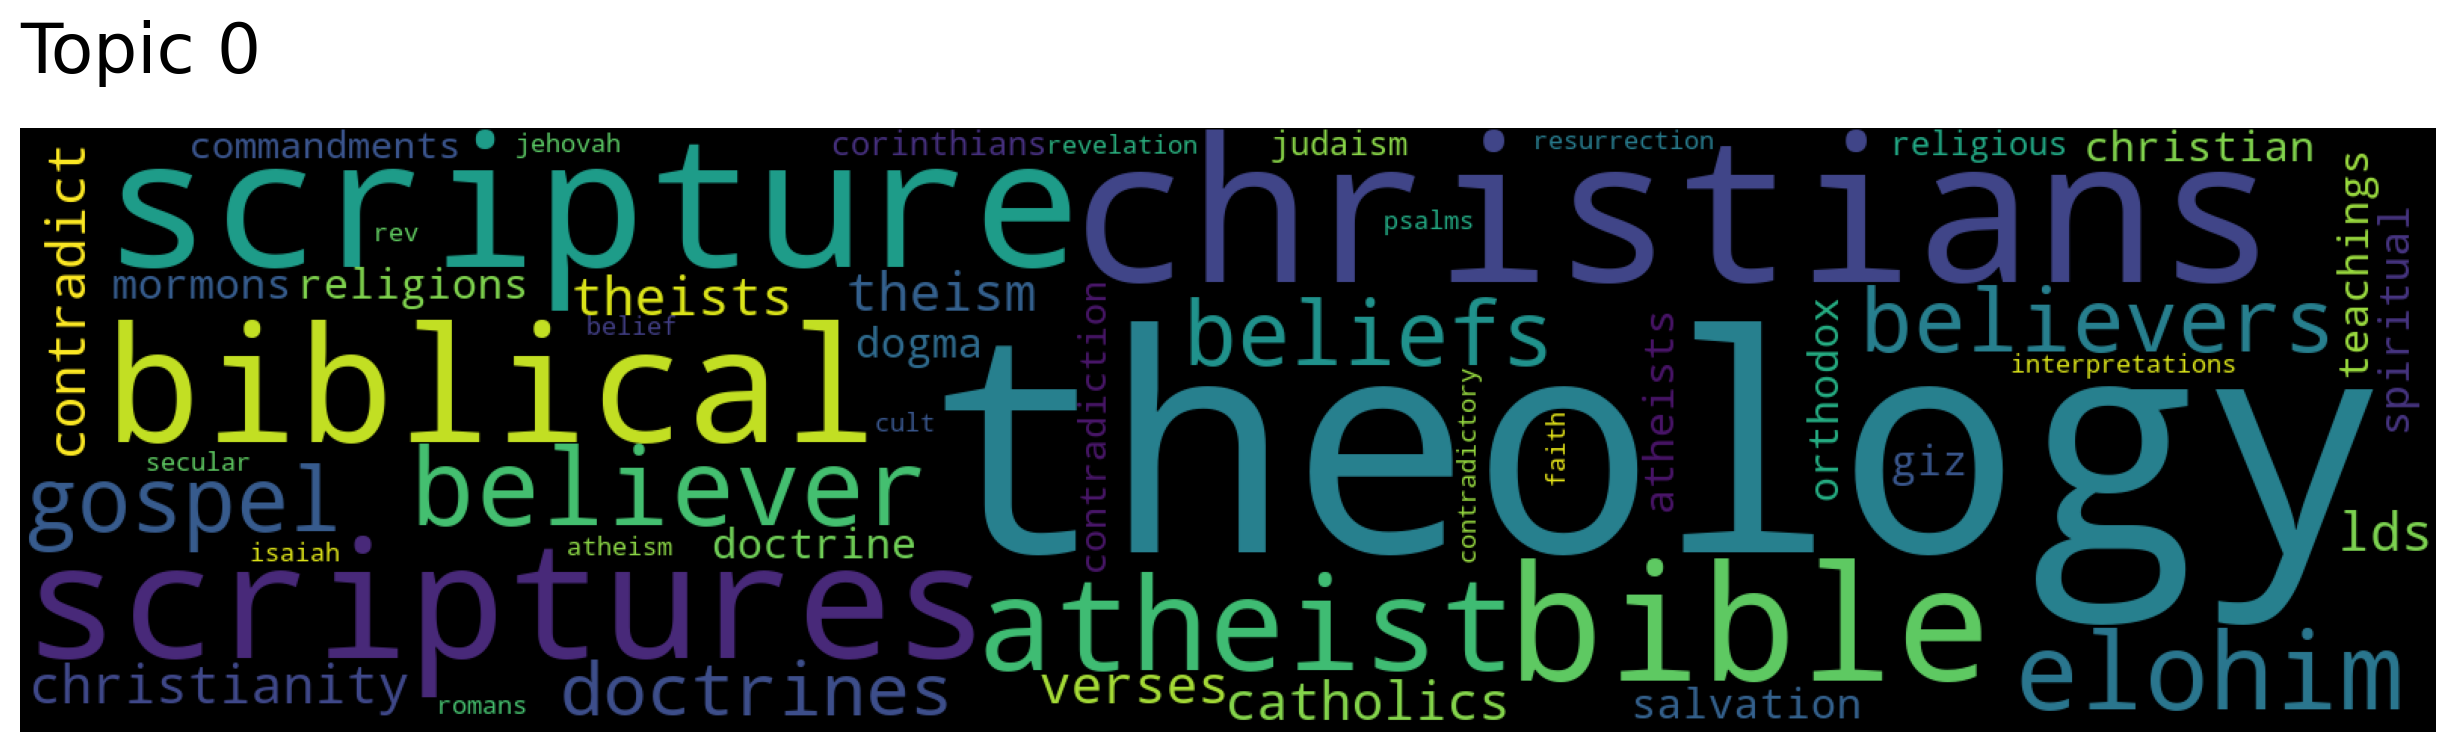

In [17]:
model.generate_topic_wordcloud(0)

## Accessing Topic Vectors

In [18]:
model.topic_vectors

array([[-0.02432673, -0.02706306,  0.0039139 , ...,  0.08830679,
         0.02654059,  0.01328256],
       [ 0.01007192, -0.07726878, -0.05591952, ...,  0.01410581,
        -0.11965605,  0.00090403],
       [-0.04076612, -0.02655532,  0.02372683, ...,  0.07282067,
        -0.06187269, -0.05322582],
       ...,
       [-0.04533971, -0.10301964,  0.01887041, ...,  0.02931783,
        -0.04899493, -0.01416789],
       [-0.02784148, -0.03693362, -0.01528182, ...,  0.0265444 ,
         0.06390838,  0.04983637],
       [-0.04378873, -0.06500755,  0.0535332 , ...,  0.02798465,
         0.06597831, -0.04437504]], dtype=float32)

## Searching for Topics by Keyword

In [19]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["politics"], num_topics=3)

In [20]:
topic_words, topic_scores

([array(['clinton', 'bush', 'president', 'reagan', 'democratic',
         'republicans', 'congress', 'wiretap', 'elected', 'administration',
         'johnson', 'election', 'executive', 'politically', 'politicians',
         'politics', 'senate', 'bill', 'political', 'lib', 'corrupt',
         'rockefeller', 'constitutional', 'ford', 'iraq', 'nist',
         'democracy', 'nuy', 'feds', 'government', 'barry', 'grant',
         'convention', 'gov', 'libertarian', 'libertarians', 'nsa', 'ws',
         'koresh', 'secretary', 'affairs', 'recall', 'weren', 'govt',
         'bullshit', 'decades', 'bureau', 'jefferson', 'conservative',
         'liar'], dtype='<U15'),
  array(['um', 'ci', 'oo', 'ye', 'll', 'hmm', 'un', 'uh', 'y_', 'wt', 'on',
         'uu', 'an', 'actually', 'eh', 'way', 'des', 'er', 'se', 'not',
         'has', 'huh', 'of', 'ya', 'so', 'it', 'in', 'le', 'upon', 'hm',
         'one', 'is', 'es', 'at', 'ne', 'what', 'au', 'no', 'mm', 'shut',
         'est', 'dont', 'got', 'tu',

## Searching for Documents by Topic

In [21]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 17197, Score: 0.7648173570632935
-----------

Probably because it IS rape.


So nothing.  It may work for some, but not for others: it doesn't give any
insight into an overall God or overall truth of a religion- it would seem to be
dependent solely on the individual, as well as individually-created.  And since
Christians have failed to show us how there way of life is in any wy better
than ours, I do not see why the attempt to try it is necessary, or even
particularly attractive.


Well, we will nerver know for sure if we were told the truth or not, but at the
very least there is a bit more evidence pointing to the fact that, say, there
was a military conflict in Vietnam 25 years ago, then there is a supernatural
diety who wants us to live a certain way.  The fact that Jesus warned against
it means nothing.  *I* warn against it too.  Big deal.


This is not true.  The first two choices here (life and death) are scantily
documented, and the last one is total malarky unless one

## Reducing the Number of Topics

In [22]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [23]:
topic_mapping[1]

[94, 93, 76, 69, 59, 95, 67, 15, 31, 12]

In [24]:
model.topic_words_reduced[0]

array(['theology', 'christians', 'beliefs', 'atheist', 'believer',
       'contradict', 'scripture', 'theists', 'bible', 'scriptures',
       'atheists', 'verses', 'christianity', 'believers', 'gospel',
       'biblical', 'lds', 'giz', 'teachings', 'theism', 'religions',
       'doctrines', 'elohim', 'dogma', 'spiritual', 'catholics',
       'contradiction', 'doctrine', 'secular', 'commandments',
       'christian', 'mormons', 'interpretations', 'religious',
       'salvation', 'atheism', 'contradictory', 'definition', 'davidians',
       'romans', 'belief', 'sinner', 'corinthians', 'convinced',
       'orthodox', 'assertion', 'cult', 'judaism', 'explicitly',
       'fallacy'], dtype='<U15')